Chapter 3
Week 4
Mariana MacDonald

In [6]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [7]:
import numpy as np

In [8]:
import nsfg
import first
import thinkstats2
import thinkplot

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [11]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [12]:
resp = nsfg.ReadFemResp()

In [13]:
# using the NSFG variable numkdhh from resp to construct pmf
pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")

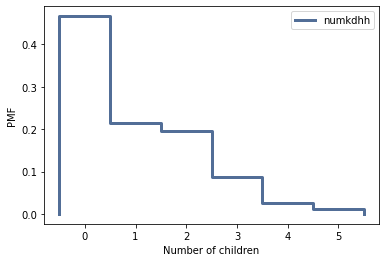

In [14]:
#plotting the pmf
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [16]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [17]:
#constructing biased distribution
biased = BiasPmf(pmf, label="biased")

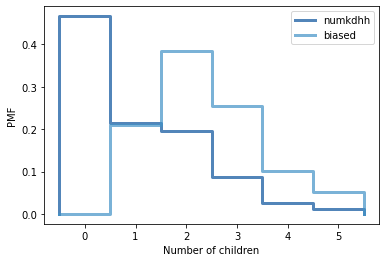

In [18]:
#plotting the biased distribution
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [19]:
#looking for the pmf mean
pmf.Mean()

1.024205155043831

In [20]:
#looking for the biased mean
biased.Mean()

2.403679100664282

In [22]:
print("Actual mean", pmf.Mean())
print("Observed mean", biased.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282


Exercise 3.2

Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [115]:
#First I defined the variable pmf
pmf = thinkstats2.Pmf(resp.numkdhh)

In [116]:
#Found the mean based on the pmf method (I call it method_one below)
pmf.Mean()

1.024205155043831

In [117]:
#Found the variance on the pmf method (I call it method_one below0
pmf.Var()

1.4128643263531195

In [118]:
#Used the function provided in the chapter taking pmf as the object 
#to find the mean
def PmfMean(pmf):
    return sum(p * x for x, p in pmf.Items())

In [119]:
#verified the mean (I call it as method_two below)
PmfMean(pmf)

1.024205155043831

In [120]:
#Used the function provided in the chapter taking pmf as the object
#to find the var

def PmfVar(pmf, mu=None):
    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [121]:
#verified the variance (I call it as method_two below)
PmfVar(pmf)

1.4128643263531195

In [122]:
#here I used a if/else function to check if the methods were equal

method_one = pmf.Mean()
method_two = PmfMean(pmf)

if method_one == method_two:
    print("Method one equals method two")
else:
    print("Method one does NOT equals method two")

Method one equals method two


In [123]:
#here I used a if/else function to check if the methods were equal

method_one = pmf.Var()
method_two = PmfVar(pmf)

if method_one == method_two:
    print("Method one equals method two")
else:
    print("Method one does NOT equals method two")

Method one equals method two


In [ ]:
Chapter 4
Exercise 4.1

In [1]:
import numpy as np

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [23]:
import thinkstats2
import thinkplot

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [24]:
#Since I am the second child, I used the variable below (other)
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

In [25]:
#here I used the other.cdf variable to calculate the percentile rank
#using my weight at birth. 
other_cdf.PercentileRank(10.1)

98.4812834224599

4.2

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [47]:
#here I asked for the 1000 random numbers to be generated
random_numbers = np.random.random(1000)

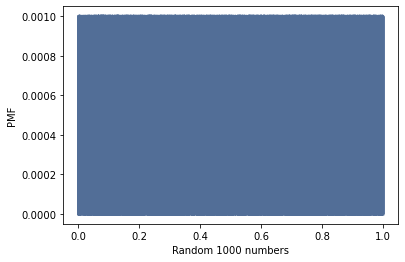

In [45]:
#then I creaed the variable pmf using the thinkstats2.pmf and as the
#object, the random numbers, then used the thinkplot to put in the 
#graph form and used the Config to add labels to the plot
pmf = thinkstats2.Pmf(random_numbers)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Random 1000 numbers', ylabel='PMF')

In this scenario, the 1000 random numbers are not compared to anything else, so each number has the same probability as the other, no trends are present, no spikes, so it's uniform.

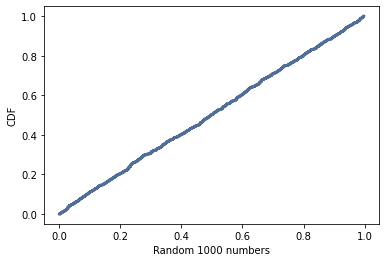

In [41]:
#here I calculated the CDF using the thinkstates2.cdf formula
#and then plot
cdf = thinkstats2.Cdf(random_numbers)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random 1000 numbers', ylabel='CDF')

It is a straight line, so it's considered uniform. 10% of the sample is below the 10th percentile, 20% is below the 20 percentile and so on.